In [3]:
%store

Stored variables and their in-db values:
GWNF_gdf                        ->     OBJECTID    PROCLAIMED                        
JNF_gdf                         ->     OBJECTID    PROCLAIMED                 FORESTN
band_dict                       -> {'aerosol': <xarray.DataArray (y: 447, x: 504)> Si
data_dir                        -> 'C:\\Users\\tjsto\\earth-analytics\\data\\habitat-
denver_das                      -> {'red': <xarray.DataArray (y: 599, x: 533)> Size: 
denver_red_gdf                  ->       area_id    city state  city_survey          
denver_red_ndvi_gdf             ->       area_id    city state  city_survey          
ndvi_da                         -> <xarray.DataArray (y: 447, x: 504)> Size: 901kB
ar
site_list                       -> [    OBJECTID    PROCLAIMED                       


# Harmonize your data
 Make sure that the grids for each of your layers match up. Check out the ds.rio.reproject_match() method from rioxarray.

In [1]:
def print_raster(raster):
    print(
        f"shape: {raster.rio.shape}\n"
        f"resolution: {raster.rio.resolution()}\n"
        f"bounds: {raster.rio.bounds()}\n"
        f"sum: {raster.sum().item()}\n"
        f"CRS: {raster.rio.crs}\n"
    )

In [2]:
print_raster(slope_da)

NameError: name 'slope_da' is not defined

In [ ]:
slope_da_repr_match = slope_da.rio.reproject_match(GWNF_ph_da)

print("Reprojected Raster:\n--------------\n")
print_raster(slope_da_repr_match)
print("Raster to Match:\n-------------\n")
print_raster(GWNF_ph_da)


Reprojected Raster:
--------------

shape: (5901, 7281)
resolution: (0.0002777777777751586, -0.00027777777777515666)
bounds: (-80.30861111111763, 37.519444444467865, -78.2861111111367, 39.15861111111906)
sum: 138414512.0
CRS: EPSG:4326

Raster to Match:
-------------

shape: (5901, 7281)
resolution: (0.00027777777777515943, -0.00027777777777515666)
bounds: (-80.30861111111763, 37.519444444467865, -78.2861111111367, 39.15861111111906)
sum: 215436000.0
CRS: EPSG:4326



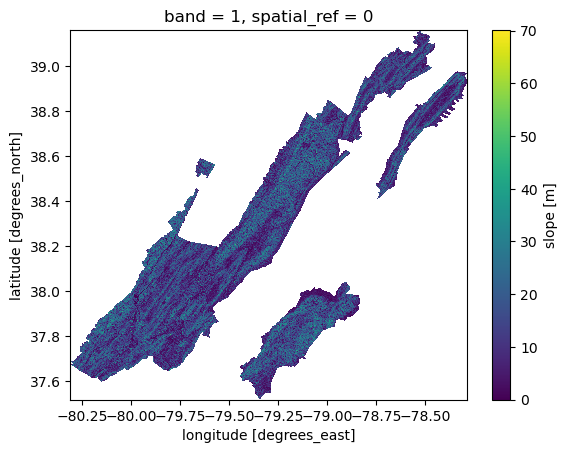

In [ ]:
slope_da_repr_match.plot()

In [ ]:
ph_da_repr_match = GWNF_ph_da.rio.reproject_match(slope_da)

print("Reprojected Raster:\n--------------\n")
print_raster(ph_da_repr_match)
print("Raster to Match:\n-------------\n")
print_raster(slope_da)

Reprojected Raster:
--------------

shape: (6773, 6428)
resolution: (27.086143519209955, -27.086143519209873)
bounds: (560982.4441192525, 4153819.9566479474, 735092.1746607341, 4337274.406703556)
sum: 216077184.0
CRS: EPSG:32617

Raster to Match:
-------------

shape: (6773, 6428)
resolution: (27.086143519209955, -27.086143519209873)
bounds: (560982.4441192525, 4153819.9566479474, 735092.1746607341, 4337274.406703556)
sum: 143210768.0
CRS: EPSG:32617



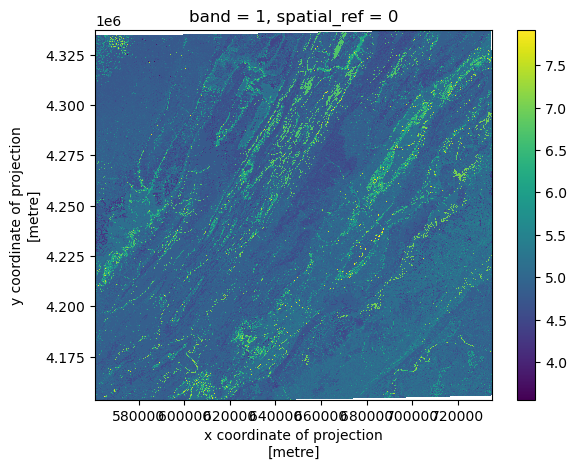

In [ ]:
ph_da_repr_match.plot()
